## 决策树 vs 随机森林

In [3]:
# data preprocessing
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

data = load_breast_cancer()
X, y = data.data, data.target

random_state = 0
n_tree = 150

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=random_state)

In [ ]:
# decision tree
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=random_state)
tree.fit(X=X_train,y=y_train)
tree_score = tree.score(X_test,y_test)
print("the score of decision tree is {}\n".format(tree_score))

In [ ]:
# random forest
from sklearn.ensemble import RandomForestClassifier
trees = RandomForestClassifier(n_estimators=n_tree,random_state=random_state)
trees.fit(X=X_train,y=y_train)
trees_score = trees.score(X_test,y_test)
print("the score of random forest is {}\n".format(trees_score))

In [ ]:
# model evaluation OOB
# criterion : {'gini', 'entropy'}
ensemble_clfs = [
    ("criterion='gini'",
    RandomForestClassifier(oob_score=True,criterion='gini')
    ),
    ("criterion='entropy'",
    RandomForestClassifier(oob_score=True,criterion='entropy')
    )
]
# 树的个数
min_n_tree = 15
max_n_tree = 150

oob_error_dict = {}
for label, clf_rf in ensemble_clfs:
    oob_error_list = []
    for i in range(min_n_tree, max_n_tree+1, 5):
        # 给随机森林设置参数
        clf_rf.set_params(n_estimators=i)
        clf_rf.set_params(random_state=random_state)
        # 拟合
        clf_rf.fit(X,y)
        # 记录oob error
        oob_error = 1 - clf_rf.oob_score_
        # 保存
        oob_error_list.append(oob_error)
    oob_error_dict[label] = oob_error_list

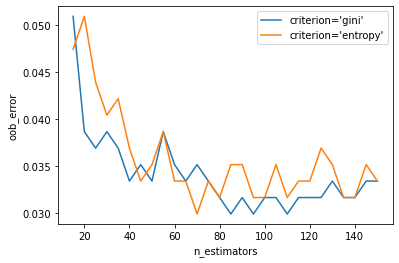

In [17]:
# 图形化
import matplotlib.pyplot as plt
for label, clf_err in oob_error_dict.items():
    x = range(min_n_tree, max_n_tree+1, 5)
    plt.plot(x,clf_err,label=label)
    plt.legend()
    plt.xlabel('n_estimators')
    plt.ylabel('oob_error')
plt.show()

Text(0, 0.5, 'features')

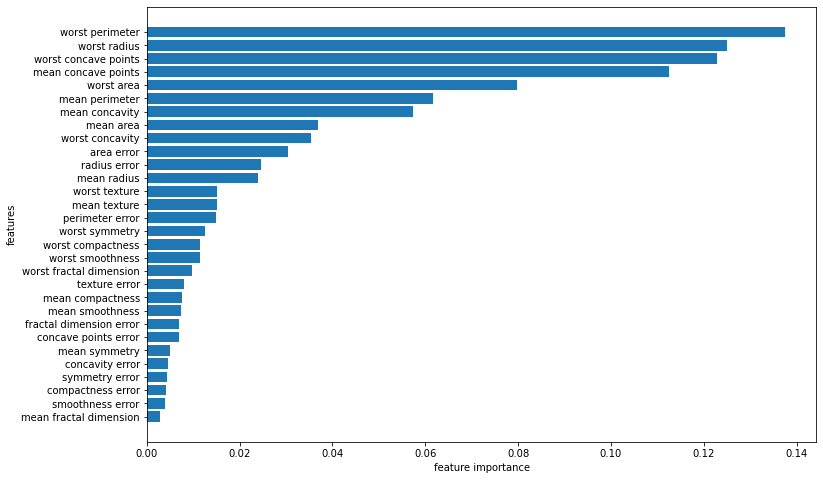

In [21]:
# feature importance
trees.feature_importances_

# 对feature排序
trees_importance_sort_id = np.argsort(trees.feature_importances_)

# 条形图
import numpy as np
n_feature = X.shape[1]
plt.figure(figsize=(12,8))
# x的宽度是根据trees.feature_importances_来的
# y的长度是根据feature的个数定的
plt.barh(range(n_feature), trees.feature_importances_[trees_importance_sort_id], align='center')
plt.yticks(range(n_feature), data.feature_names[trees_importance_sort_id])
plt.xlabel('feature importance')
plt.ylabel('features')

## 随机森林 vs AdaBoosting vs Gradient Boosting Decision Tree

In [1]:
random_state = 0
n_tree = 150
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
clf_rf = RandomForestClassifier(n_estimators=n_tree)
clf_ada = AdaBoostClassifier(n_estimators=n_tree, random_state=random_state)
clf_GBDT = GradientBoostingClassifier(n_estimators=n_tree, random_state=random_state)

In [4]:
from mlxtend.evaluate import bias_variance_decomp
mse_rf, bias_rf, var_rf = bias_variance_decomp(clf_rf,X_train,y_train,X_test,y_test,loss='mse',random_seed=0,num_rounds=5)
mse_ada, bias_ada, var_ada = bias_variance_decomp(clf_ada,X_train,y_train,X_test,y_test,loss='mse',random_seed=0,num_rounds=5)
mse_GBDT, bias_GBDT, var_GBDT = bias_variance_decomp(clf_GBDT,X_train,y_train,X_test,y_test,loss='mse',random_seed=0,num_rounds=5)

import pandas as pd
pd.DataFrame(
    data=[
        [mse_rf, bias_rf, var_rf],
        [mse_ada, bias_ada, var_ada],
        [mse_GBDT, bias_GBDT, var_GBDT]
    ],
    index=['rf', 'ada', 'GBDT'],
    columns=['MSE', 'BIAS', 'VAR']
)

,MSE,BIAS,VAR
rf,0.046154,0.030490,0.015664
ada,0.040559,0.015944,0.024615
GBDT,0.043357,0.024336,0.019021
